¿Qué hace un árbol de clasificación?

Un árbol de clasificación divide los datos en ramas tomando decisiones basadas en condiciones sobre las variables, hasta llegar a una predicción final.

Fitting 5 folds for each of 90 candidates, totalling 450 fits
✅ Mejor configuración: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
✅ ROC AUC Score: 0.815


📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



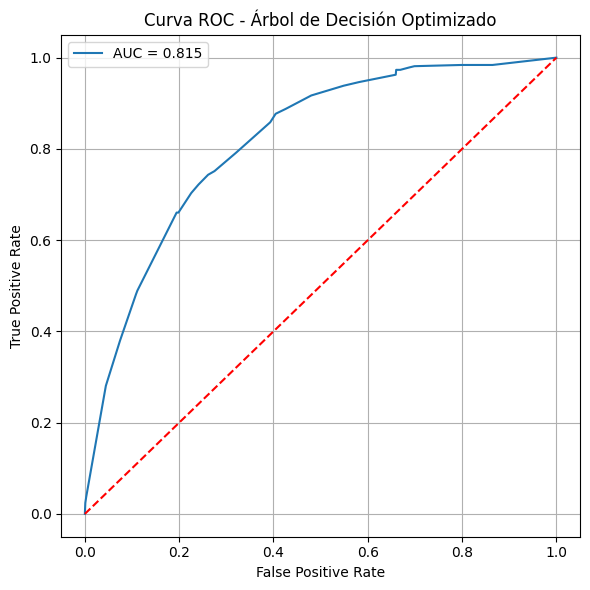

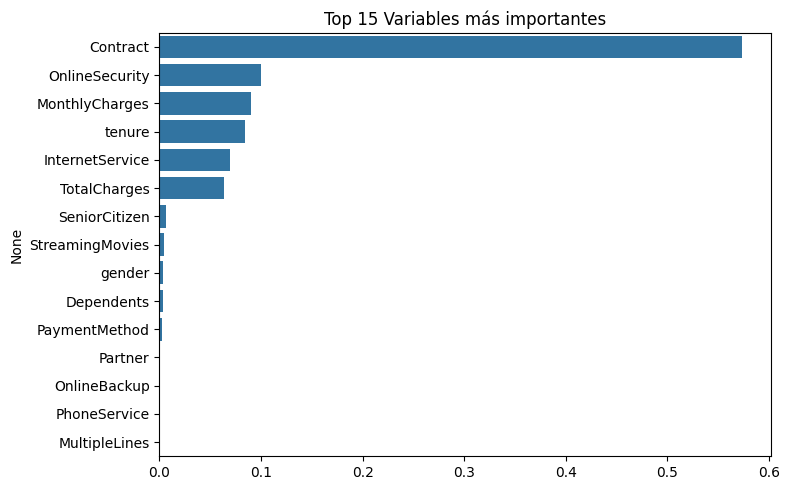

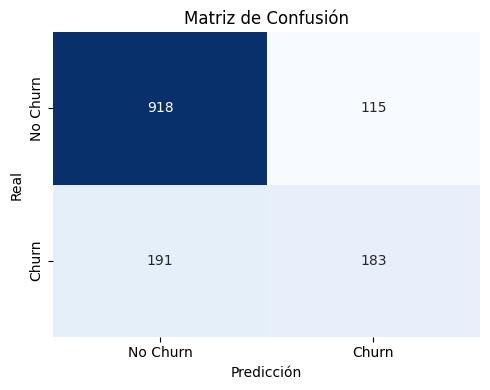

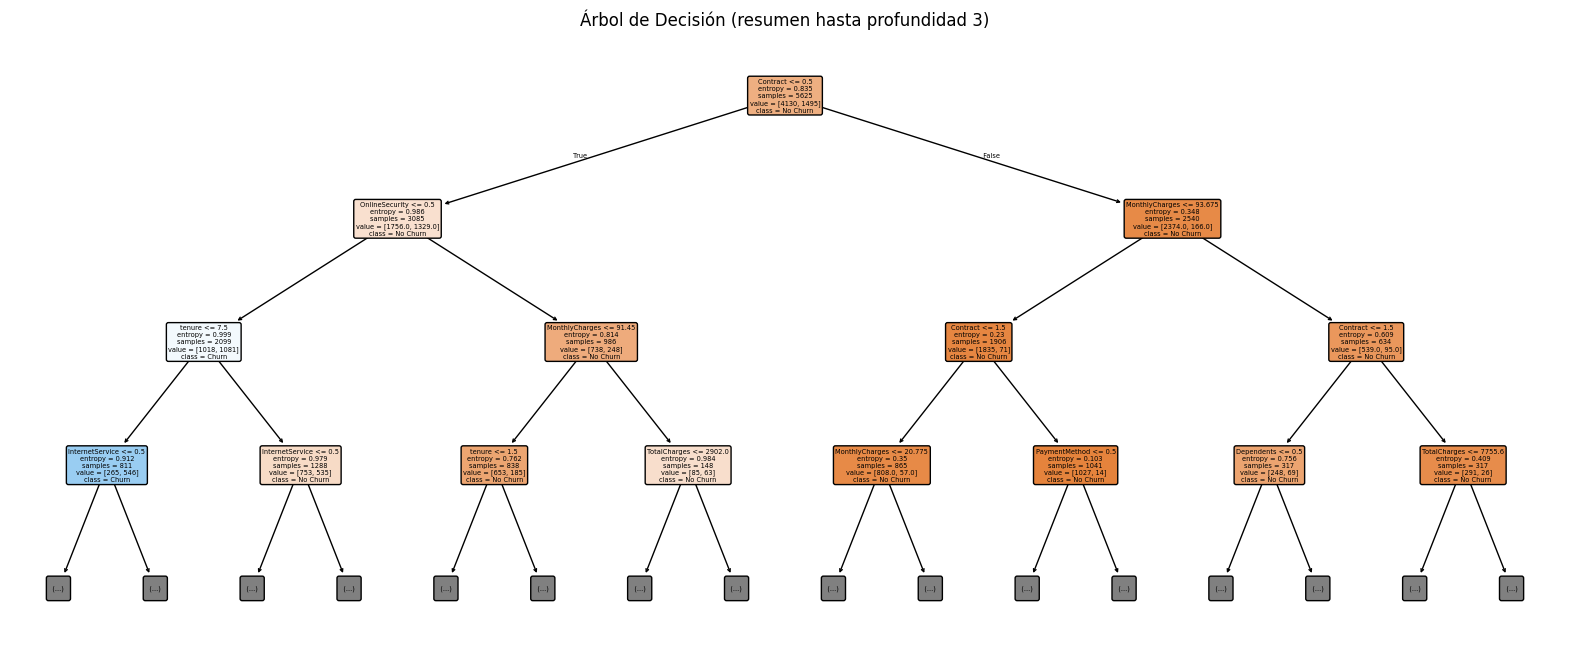

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"✅ Mejor configuración: {grid.best_params_}")
print(f"✅ ROC AUC Score: {auc:.3f}\n")
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árbol de Decisión Optimizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Variables más importantes")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 8))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=3  
)
plt.title("Árbol de Decisión (resumen hasta profundidad 3)")
plt.show()


Fitting 5 folds for each of 90 candidates, totalling 450 fits
✅ Mejor configuración: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
✅ ROC AUC Score: 0.791

📊 Matriz de Confusión:
 [[797 236]
 [122 252]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.67      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.75      1407



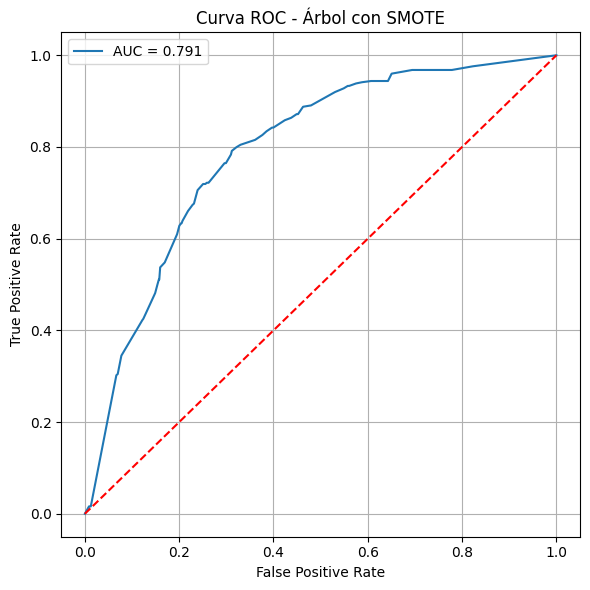

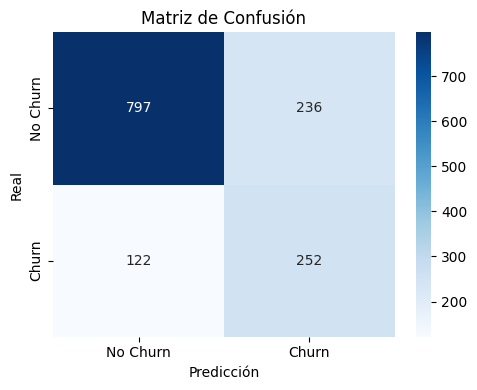

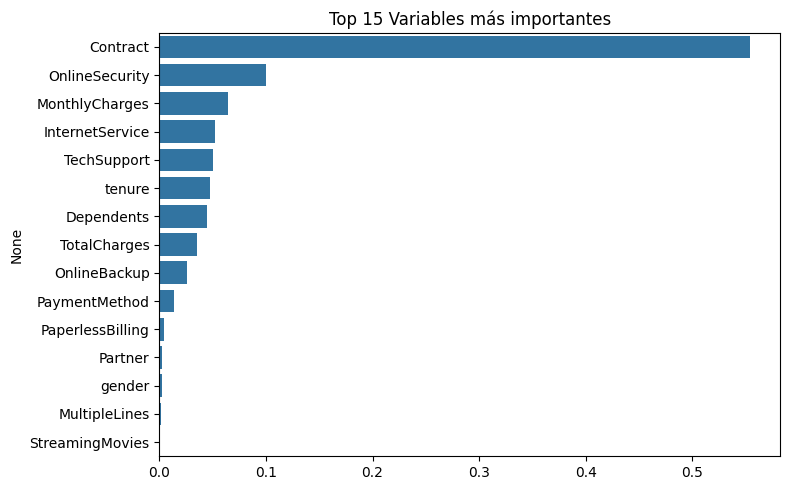

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_res, y_train_res)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"✅ Mejor configuración: {grid.best_params_}")
print(f"✅ ROC AUC Score: {auc:.3f}\n")
print("📊 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árbol con SMOTE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Variables más importantes")
plt.tight_layout()
plt.show()


## Conclusión final explicada

El modelo entrenado con árbol de decisión logra una **buena capacidad discriminativa general**, como lo refleja el **AUC de 0.815**. El modelo es mucho mejor **prediciendo a los que no hacen churn (clase 0)** que a los que sí (clase 1).

A pesar de haber intentado **balancear las clases con SMOTE**, no se logra una mejora significativa, probablemente debido a las características de los datos o a las limitaciones del algoritmo. 

 En este caso lo que hariamos seria probar algoritmos más robustos como **Random Forest** con `class_weight='balanced'`, para mejorar la **sensibilidad** sin comprometer tanto la **precisión**.
